In [ ]:
!pip install transformers
!pip install scipy


In [ ]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
# load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
tweet_proc = 'Thanks for the data and how was Soo 👀?'

encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
print(encoded_tweet)

{'input_ids': tensor([[    0, 22086,    13,     5,   414,     8,   141,    21,   407,   139,
         26964,  7471,   116,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
# sentiment analysis
# output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
output = model(**encoded_tweet)

scores = output[0][0].detach().numpy()
scores = softmax(scores)

for i in range(len(scores)):

    l = labels[i]
    s = scores[i]
    print(l,s)

Negative 0.003778004
Neutral 0.26233217
Positive 0.7338898


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Cargar los datos de tu base de datos
# Asumo que 'hey' es un DataFrame de pandas
hey = pd.read_csv('/Hey.csv')  # Cambia la ruta según tu caso

# Definir el modelo y el tokenizador
roberta = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

# Etiquetas de sentimiento
labels = ['Negative', 'Neutral', 'Positive']

# Función para calcular el puntaje de sentimiento para un tweet dado
def calculate_sentiment_score(tweet):
    encoded_tweet = tokenizer(tweet, return_tensors='pt', truncation=True, padding=True)
    output = model(**encoded_tweet)
    scores = output.logits.detach().numpy()[0]
    scores = softmax(scores)
    return scores

# Calcular los puntajes de sentimiento para cada tweet
sentiment_scores = []
for tweet in hey['Traduccion']:
    scores = calculate_sentiment_score(tweet)
    sentiment_scores.append(scores)

# Añadir los puntajes de sentimiento a una nueva columna en el DataFrame
hey['score_sentimiento'] = sentiment_scores

# Guardar el DataFrame modificado de vuelta en la base de datos
#hey.to_csv('ruta/a/hey_con_sentimientos.csv', index=False)  # Cambia la ruta según tu caso
display(hey)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet,Traduccion,sentimiento_predicho,score_sentimiento
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi...","Resolved, thank you very much, excellent servi...",0,"[0.0027196107, 0.015994774, 0.9812856]"
1,2023-01-02,NaN,"Muchas gracias, espero su dm","Thank you very much, I wait for your DM",0,"[0.0020432086, 0.031998936, 0.9659579]"
2,2023-01-02,NaN,Muchas gracias!,Thank you so much!,0,"[0.001919538, 0.012904706, 0.9851757]"
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...,Something similar happened to me.I wanted to r...,0,"[0.034688573, 0.34488544, 0.62042606]"
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,Yeeeei!Through my account I just hired my savi...,0,"[0.0020827702, 0.05299308, 0.9449242]"
...,...,...,...,...,...,...
807,2024-04-21,15:21:43,"Ahora confirmo, gracias estimado","Now I confirm, thanks estimated",0,"[0.011387059, 0.24591032, 0.74270266]"
808,2024-04-23,22:52:05,😔 de acuerdo!! Muchas gracias.,😔 Okay !!Thank you so much.,0,"[0.002643506, 0.025445815, 0.9719107]"
809,2024-04-23,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...","Uncle when they are going to graduate, I have ...",0,"[0.029572854, 0.5939527, 0.37647447]"
810,2024-04-25,00:51:24,"una duda, con quién tengo que ver si tengo pro...","A question, with whom I have to do if I have t...",0,"[0.32440168, 0.58034414, 0.09525418]"


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Cargar los datos de tu base de datos
# Asumo que 'hey' es un DataFrame de pandas
hey = pd.read_csv('/hey_.csv')  # Cambia la ruta según tu caso

# Definir el modelo y el tokenizador
roberta = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

# Etiquetas de sentimiento
labels = ['Negative', 'Neutral', 'Positive']

# Función para calcular el puntaje de sentimiento para un tweet dado
def calculate_sentiment_score(tweet):
    encoded_tweet = tokenizer(tweet, return_tensors='pt', truncation=True, padding=True)
    output = model(**encoded_tweet)
    scores = output.logits.detach().numpy()[0]
    scores = softmax(scores)
    sentiment_label = labels[scores.argmax()]
    return scores, sentiment_label

# Calcular los puntajes de sentimiento y las etiquetas para cada tweet
sentiment_scores = []
sentiment_labels = []
predominant_scores = []
for tweet in hey['Traduccion']:
    scores, label = calculate_sentiment_score(tweet)
    sentiment_scores.append(scores)
    sentiment_labels.append(label)
    predominant_scores.append(scores.max())

# Añadir los puntajes de sentimiento y las etiquetas a nuevas columnas en el DataFrame
#hey['score_sentimiento'] = sentiment_scores
hey['etiqueta_sentimiento'] = sentiment_labels
hey['score_sentimiento'] = predominant_scores
# Guardar el DataFrame modificado de vuelta en la base de datos
#hey_.to_csv('/hey_.csv', index=False)  # Cambia la ruta según tu caso
hey.to_csv('hey_sentiment.csv', index=False)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
display(hey)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet,Traduccion,sentimiento_predicho,etiqueta_sentimiento,score_sentimiento
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi...","Resolved, thank you very much, excellent servi...",0,Positive,0.981286
1,2023-01-02,NaN,"Muchas gracias, espero su dm","Thank you very much, I wait for your DM",0,Positive,0.965958
2,2023-01-02,NaN,Muchas gracias!,Thank you so much!,0,Positive,0.985176
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...,Something similar happened to me.I wanted to r...,0,Positive,0.620426
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,Yeeeei!Through my account I just hired my savi...,0,Positive,0.944924
...,...,...,...,...,...,...,...
807,2024-04-21,15:21:43,"Ahora confirmo, gracias estimado","Now I confirm, thanks estimated",0,Positive,0.742703
808,2024-04-23,22:52:05,😔 de acuerdo!! Muchas gracias.,😔 Okay !!Thank you so much.,0,Positive,0.971911
809,2024-04-23,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...","Uncle when they are going to graduate, I have ...",0,Neutral,0.593953
810,2024-04-25,00:51:24,"una duda, con quién tengo que ver si tengo pro...","A question, with whom I have to do if I have t...",0,Neutral,0.580344


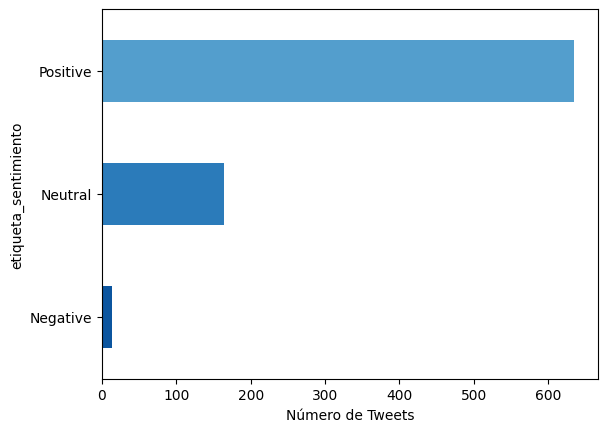

In [ ]:
# @title etiqueta_sentimiento

from matplotlib import pyplot as plt
import seaborn as sns
hey.groupby('etiqueta_sentimiento').size().plot(kind='barh', color=sns.palettes.mpl_palette('Blues_r'))
plt.gca().spines# Agregar etiqueta al eje x
plt.xlabel('Número de Tweets')

# Mostrar el gráfico
plt.show()


In [ ]:
from google.colab import files

# Descargar el archivo creado
files.download('hey_sentiment.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Suponiendo que 'hey' es tu DataFrame
# Verificar si hay valores nulos en el DataFrame
if hey.isnull().any().any():
    print("El DataFrame contiene valores nulos.")
else:
    print("El DataFrame no contiene valores nulos.")
